# Incidence de la varicelle

In [2]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence de la varicelle sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1991 et se termine avec une semaine récente.

Pour nous protéger contre une éventuelle disparition ou modification du serveur du Réseau Sentinelles, nous faisons une copie locale de ce jeux de données.

Il est inutile et même risquée de télécharger les données à chaque exécution, car dans le cas d'une panne nous pourrions remplacer nos données par un fichier défectueux. Pour cette raison, nous téléchargeons les données seulement si la copie locale n'existe pas.

In [8]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"
file_name = "incidence-PAY-7.csv"

if os.path.isfile(file_name):
    raw_data = pd.read_csv(file_name)
    print("Data imported via the local file.")
else:
    raw_data = pd.read_csv(data_url, skiprows=1)
    print("Data downloaded via the url.")
    raw_data.to_csv(file_name)
    print("Data saved locally.")
    
raw_data

Data imported via the local file.


Unnamed: 0    week  indicator    inc  inc_low  inc_up  inc100  \
0              0  202137          7   1984      761    3207       3   
1              1  202136          7   3441     1730    5152       5   
2              2  202135          7   2562     1107    4017       4   
3              3  202134          7   1429      378    2480       2   
4              4  202133          7   3829     1830    5828       6   
5              5  202132          7   4108     1895    6321       6   
6              6  202131          7   4793     2301    7285       7   
7              7  202130          7   7190     4191   10189      11   
8              8  202129          7   6800     4109    9491      10   
9              9  202128          7   9734        0   21731      15   
10            10  202127          7   9026     4316   13736      14   
11            11  202126          7   7284     4108   10460      11   
12            12  202125          7   9351     6540   12162      14   
13            13  202124          7  12034     8937   15131      18   
14            14  202123          7   9116     6420   11812      14   
15            15  202122          7   4817     2752    6882       7   
16            16  202121          7   6092     3458    8726       9   
17            17  202120          7   7485     4601   10369      11   
18            18  202119          7   6654     4370    8938      10   
19            19  202118          7   3912     2110    5714       6   
20            20  202117          7   4686     2878    6494       7   
21            21  202116          7   4780     2891    6669       7   
22            22  202115          7  11215     7627   14803      17   
23            23  202114          7  11197     7994   14400      17   
24            24  202113          7   9714     6289   13139      15   
25            25  202112          7  11520     8415   14625      17   
26            26  202111          7   9386     6678   12094      14   
27            27  202110          7   9056     6452   11660      14   
28            28  202109          7  10988     7938   14038      17   
29            29  202108          7  11281     8361   14201      17   
...          ...     ...        ...    ...      ...     ...     ...   
1577        1577  199126          7  17608    11304   23912      31   
1578        1578  199125          7  16169    10700   21638      28   
1579        1579  199124          7  16171    10071   22271      28   
1580        1580  199123          7  11947     7671   16223      21   
1581        1581  199122          7  15452     9953   20951      27   
1582        1582  199121          7  14903     8975   20831      26   
1583        1583  199120          7  19053    12742   25364      34   
1584        1584  199119          7  16739    11246   22232      29   
1585        1585  199118          7  21385    13882   28888      38   
1586        1586  199117          7  13462     8877   18047      24   
1587        1587  199116          7  14857    10068   19646      26   
1588        1588  199115          7  13975     9781   18169      25   
1589        1589  199114          7  12265     7684   16846      22   
1590        1590  199113          7   9567     6041   13093      17   
1591        1591  199112          7  10864     7331   14397      19   
1592        1592  199111          7  15574    11184   19964      27   
1593        1593  199110          7  16643    11372   21914      29   
1594        1594  199109          7  13741     8780   18702      24   
1595        1595  199108          7  13289     8813   17765      23   
1596        1596  199107          7  12337     8077   16597      22   
1597        1597  199106          7  10877     7013   14741      19   
1598        1598  199105          7  10442     6544   14340      18   
1599        1599  199104          7   7913     4563   11263      14   
1600        1600  199103          7  15387    10484   20290      27   
1601        1601  199102      

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

Nous vérifions si il y a des point manquants dans ce jeux de données. Ce n'est pas le cas.

In [9]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Unnamed: 0, week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [11]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data = raw_data.copy()
data['period'] = [convert_week(yw) for yw in data['week']]

 Il restent deux petites modifications à faire.Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [12]:
sorted_data = data.set_index('period').sort_index()

 Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde. Aucune incohérence est détectée.

In [14]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

 Nous affichons l'incidence en fonction du temps.

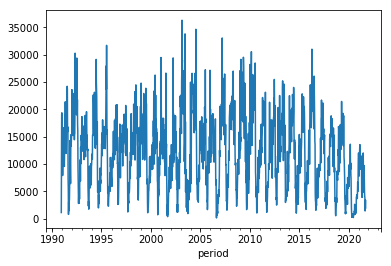

In [15]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre des creux d'incidences vers septembre.

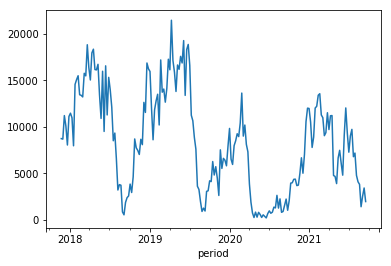

In [17]:
sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval
entre deux années civiles, nous définissons la période de référence
entre deux minima de l'incidence, du 1er août de l'année N au
1er août de l'année N+1. Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er septembre de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er septembre.Comme l'incidence de syndrome grippal est très faible en été, cette
modification ne risque pas de fausser nos conclusions.Encore un petit détail: les données commencent an décembre 1990, ce qui rend la première année incomplète. Nous commençons donc l'analyse en 1991.

In [23]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er septembre, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [25]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

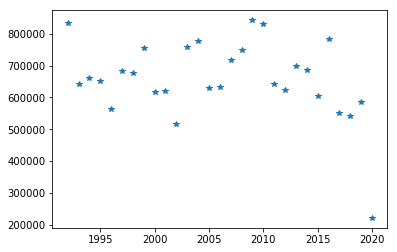

In [26]:
yearly_incidence.plot(style='*')

On affiche le incidences minimum et maximum.


In [31]:
print("Year:",yearly_incidence.idxmax(),",Incidence max:",yearly_incidence.max())
print("Year:",yearly_incidence.idxmin(),",Incidence min:",yearly_incidence.min())

Year: 2009 ,Incidence max: 842373
Year: 2020 ,Incidence min: 221186
